<a href="https://colab.research.google.com/github/Meet0709/bharat_task_intern/blob/main/SMS_spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [35]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5402,spam,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5403,ham,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5404,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5405,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Renamig the columns names v2 & v1 as Messages and Labels
df1 = df.rename(columns={'v2':'Messages', 'v1':'Labels'},inplace=True)
df.head()

,Labels,Messages,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
X = df['Messages']
y = df['Labels']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create a CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [40]:
# Create a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [41]:
# Make predictions on the test set
predictions = classifier.predict(X_test_counts)

In [42]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [43]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.94

Confusion Matrix:
[[930   3]
 [ 60  89]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       933
        spam       0.97      0.60      0.74       149

    accuracy                           0.94      1082
   macro avg       0.95      0.80      0.85      1082
weighted avg       0.94      0.94      0.94      1082



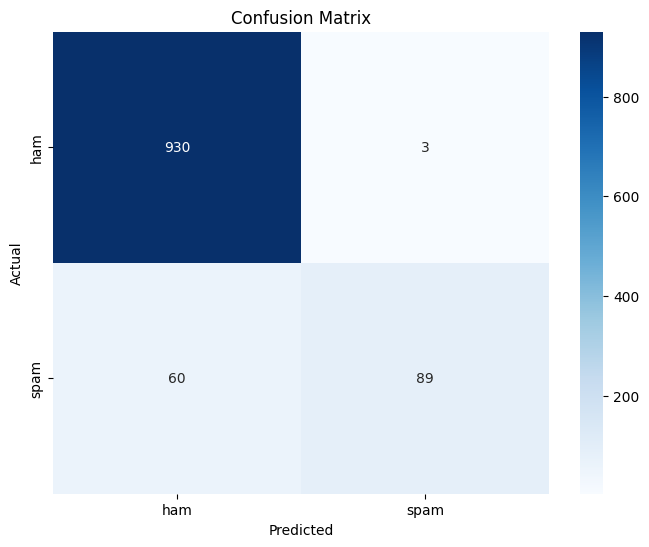

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

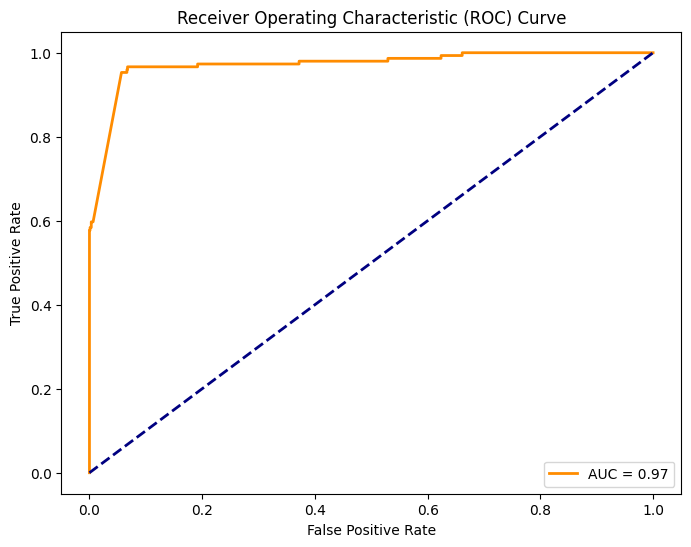

In [46]:
y_probs = classifier.predict_proba(X_test_counts)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()